# Project: Airbnb Price Prediction

## Import Libraries

In [84]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix as conMatrix
from sklearn.metrics import classification_report as ClassR
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import utils
import xgboost as xg 
from scipy import stats
from scipy.stats import norm, skew
from sklearn.ensemble import RandomForestRegressor 
%matplotlib inline
import os

## Importing data and Data Cleaning

## Importing Data

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
train_data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [5]:
train_data['city'].unique

<bound method Series.unique of 0        NYC
1        NYC
2        NYC
3         SF
4         DC
        ... 
74106    NYC
74107     LA
74108    NYC
74109    NYC
74110     LA
Name: city, Length: 74111, dtype: object>

In [6]:
train_data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


## Visualizing and Analyzing the Data


 mu = 4.78 and sigma = 0.72



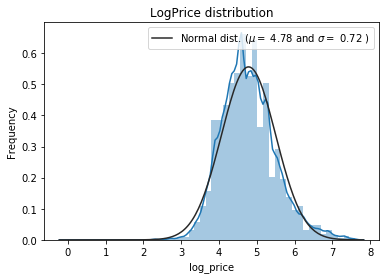

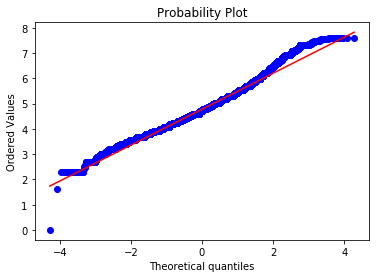

In [7]:
sns.distplot(train_data['log_price'] , fit=norm);
# Get the fitted parameters
(mu, sigma) = norm.fit(train_data['log_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('LogPrice distribution')
#the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['log_price'], plot=plt)
plt.show()

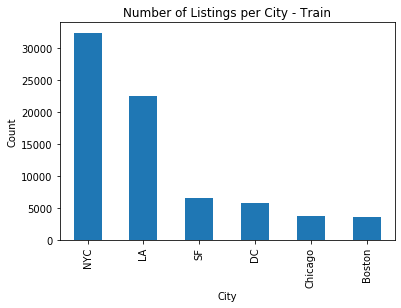

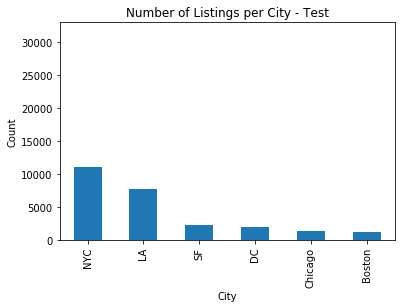

In [8]:
train_data['city'].value_counts().plot(kind='bar')
plt.title('Number of Listings per City - Train')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

test_data['city'].value_counts().plot(kind='bar')
plt.title('Number of Listings per City - Test')
plt.xlabel('City')
plt.ylabel('Count')
plt.ylim(0,33000 )
plt.show()

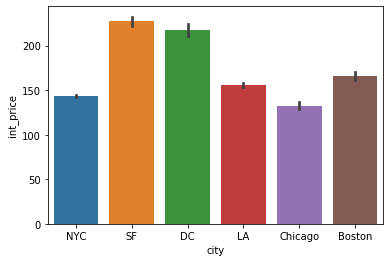

In [9]:
train_data['int_price'] = np.exp(train_data['log_price'])
plot1 = sns.barplot(x='city',y='int_price',data=train_data)
fig = plot1.get_figure()


In [10]:
import folium

MAPdata = train_data.copy()
MAPdata = MAPdata.sample(1000) #nlargest(100, 'log_price')
MAPdataloc = MAPdata[['latitude','longitude']]
MAPdatalist = MAPdataloc.values.tolist()

MAPdatat = test_data.copy()
MAPdatat = MAPdatat.sample(1000)
MAPdataloct = MAPdatat[['latitude','longitude']]
MAPdatalistt = MAPdataloct.values.tolist()


mapall = folium.Map(location=[38.9072, -77.0369], zoom_start=11.5)

for point in range(0, len(MAPdatalist)):
    folium.Marker(MAPdatalist[point], icon=folium.Icon(color='red', icon='home')).add_to(mapall)
for point in range(0, len(MAPdatalistt)):
    folium.Marker(MAPdatalistt[point], icon=folium.Icon(color='blue', icon='home')).add_to(mapall)    
    
mapall

## Correlation heat map

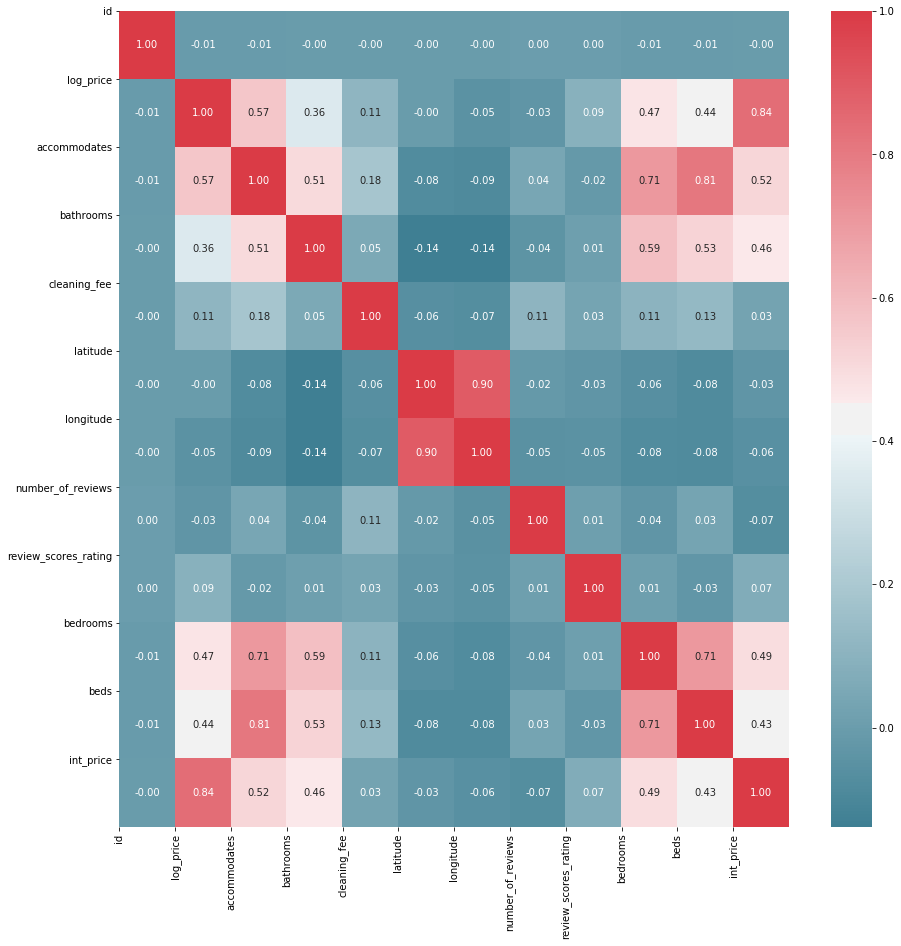

In [11]:
def plot_heatmap(df):

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(15, 15))

    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

    plt.xticks(range(len(corr.columns)), corr.columns);

    plt.yticks(range(len(corr.columns)), corr.columns)

    plt.show()

# plot correlations
plot_heatmap(train_data)

## Check for missing values

In [12]:
#Find missing values.

missing_train = train_data.isnull().sum(axis=0).reset_index()
missing_train.columns = ['column_name', 'missing_count']
missing_train = missing_train.loc[missing_train['missing_count']>0]
missing_train = missing_train.sort_values(by='missing_count')
missing_train

,column_name,missing_count
27,bedrooms,91
28,beds,131
13,host_has_profile_pic,188
14,host_identity_verified,188
16,host_since,188
6,bathrooms,200
26,zipcode,966
22,neighbourhood,6872
25,thumbnail_url,8216
18,last_review,15827


In [13]:
missing_test = test_data.isnull().sum(axis=0).reset_index()
missing_test.columns = ['column_name', 'missing_count']
missing_test = missing_test.loc[missing_test['missing_count']>0]
missing_test = missing_test.sort_values(by='missing_count')
missing_test

,column_name,missing_count
20,name,5
10,description,14
26,bedrooms,28
27,beds,46
12,host_has_profile_pic,55
13,host_identity_verified,55
15,host_since,55
5,bathrooms,79
25,zipcode,321
21,neighbourhood,2465


## Handling missing values in both train and test dataset

In [14]:
#Fill up missing values

# 'bathrooms'
train_data['bathrooms'] = train_data['bathrooms'].fillna(0)
test_data['bathrooms'] = test_data['bathrooms'].fillna(0)

# 'bedrooms'
train_data['bedrooms'] = train_data['bedrooms'].fillna(0)
test_data['bedrooms'] = test_data['bedrooms'].fillna(0)

# 'beds' 
train_data['beds'] = train_data['beds'].fillna(0)
test_data['beds'] = test_data['beds'].fillna(0)

# 'host_has_profile_pic'
train_data.loc[train_data.host_has_profile_pic == 't', 'host_has_profile_pic'] = 1
train_data.loc[train_data.host_has_profile_pic == 'f', 'host_has_profile_pic'] = 0
train_data['host_has_profile_pic'] = train_data['host_has_profile_pic'].fillna(0)
test_data.loc[test_data.host_has_profile_pic == 't', 'host_has_profile_pic'] = 1
test_data.loc[test_data.host_has_profile_pic == 'f', 'host_has_profile_pic'] = 0
test_data['host_has_profile_pic'] = test_data['host_has_profile_pic'].fillna(0)

# 'neighbourhood'
train_data['neighbourhood'] = train_data['neighbourhood'].fillna('Unknown')
test_data['neighbourhood'] = test_data['neighbourhood'].fillna('Unknown')

# 'review_scores_rating'
train_data['review_scores_rating'] = train_data['review_scores_rating'].fillna(0)
test_data['review_scores_rating'] = test_data['review_scores_rating'].fillna(0)

# 'host_response_rate'
train_data['host_response_rate'] = train_data['host_response_rate'].str.replace('%','')
train_data['host_response_rate'] = train_data['host_response_rate'].fillna('0')
train_data['host_response_rate'] = pd.to_numeric(train_data['host_response_rate'])
test_data['host_response_rate'] = test_data['host_response_rate'].str.replace('%','')
test_data['host_response_rate'] = test_data['host_response_rate'].fillna('0')
test_data['host_response_rate'] = pd.to_numeric(test_data['host_response_rate'])

# 'thumbnai_url'
train_data['thumbnail_url'] = train_data['thumbnail_url'].fillna('Unknown')
test_data['thumbnail_url'] = test_data['thumbnail_url'].fillna('Unknown')

# 'last_review'
train_data['last_review'] = train_data['last_review'].fillna('00-00-00')
test_data['last_review'] = test_data['last_review'].fillna('00-00-00')

# 'first_review'
train_data['first_review'] = train_data['first_review'].fillna('00-00-00')
test_data['first_review'] = test_data['first_review'].fillna('00-00-00')

# 'host_since'
train_data['host_since'] = train_data['host_since'].fillna('00-00-00')
test_data['host_since'] = test_data['host_since'].fillna('00-00-00')

# 'host_identity_verified'
train_data.loc[train_data.host_identity_verified == 't', 'host_identity_verified'] = 1
train_data.loc[train_data.host_identity_verified == 'f', 'host_identity_verified'] = 0
train_data['host_identity_verified'] = train_data['host_identity_verified'].fillna(0)
test_data.loc[test_data.host_identity_verified == 't', 'host_identity_verified'] = 1
test_data.loc[test_data.host_identity_verified == 'f', 'host_identity_verified'] = 0
test_data['host_identity_verified'] = test_data['host_identity_verified'].fillna(0)

# 'zipcode', ***this might take some time, but works perfect***
train_data['zipcode'] = train_data['zipcode'].fillna(0)
train_data.loc[train_data.zipcode == ' ', 'zipcode'] = 0
idx = train_data.index[train_data['zipcode']==0].tolist()
for i in idx:
    lat = train_data['latitude'][i]
    lon = train_data['longitude'][i]
    result = np.max(search.by_coordinates(lat, lon, radius=30, returns=5))
    train_data['zipcode'][i]=result.values()[0]    
train_data['zipcode'] = train_data['zipcode'].fillna(0)
test_data.loc[test_data.zipcode == ' ', 'zipcode'] = 0
idx = test_data.index[test_data['zipcode']==0].tolist()
for i in idx:
    lat = test_data['latitude'][i]
    lon = test_data['longitude'][i]
    result = np.max(search.by_coordinates(lat, lon, radius=30, returns=5))
    test_data['zipcode'][i]=result.values()[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
missing_df = train_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


## Feature Engineering for amenities

In [16]:
train_data['amenities'] = train_data['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")]))

np.concatenate(train_data['amenities'].map(lambda amns: amns.split("|")).values)


amenities = np.unique(np.concatenate(train_data['amenities'].map(lambda amns: amns.split("|")).values))
amenities_matrix = np.array([train_data['amenities'].map(lambda amns: amn in amns).values for amn in amenities])

train_data['amenities'].map(lambda amns: amns.split("|")).head()

np.unique(np.concatenate(train_data['amenities'].map(lambda amns: amns.split("|"))))

array(['', ' smooth pathway to front door', '24-hour check-in',
       'Accessible-height bed', 'Accessible-height toilet',
       'Air conditioning', 'Air purifier', 'BBQ grill', 'Baby bath',
       'Baby monitor', 'Babysitter recommendations', 'Bath towel',
       'Bathtub', 'Bathtub with shower chair', 'Beach essentials',
       'Beachfront', 'Bed linens', 'Body soap', 'Breakfast',
       'Buzzer/wireless intercom', 'Cable TV', 'Carbon monoxide detector',
       'Cat(s)', 'Changing table', 'Children’s books and toys',
       'Children’s dinnerware', 'Cleaning before checkout',
       'Coffee maker', 'Cooking basics', 'Crib', 'Disabled parking spot',
       'Dishes and silverware', 'Dishwasher', 'Dog(s)', 'Doorman',
       'Doorman Entry', 'Dryer', 'EV charger', 'Elevator',
       'Elevator in building', 'Essentials', 'Ethernet connection',
       'Extra pillows and blankets', 'Family/kid friendly',
       'Fire extinguisher', 'Fireplace guards', 'Firm matress',
       'Firm mattress

In [17]:
amenities = np.unique(np.concatenate(train_data['amenities'].map(lambda amns: amns.split("|"))))[1:]
amenity_arr = np.array([train_data['amenities'].map(lambda amns: amn in amns) for amn in amenities])
amenity_arr

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [18]:
amenity_arr = 1*amenity_arr
amenity_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [19]:
train_data = pd.concat([train_data, pd.DataFrame(data=amenity_arr.T, columns=amenities)], axis=1)

In [20]:
train_data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,Wide clearance to bed,Wide clearance to shower & toilet,Wide clearance to shower and toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,6901257,5.010635,Apartment,Entire home/apt,Wireless Internet|Air conditioning|Kitchen|Hea...,3,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,1,0,1
1,6304928,5.129899,Apartment,Entire home/apt,Wireless Internet|Air conditioning|Kitchen|Hea...,7,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,1,0,1
2,7919400,4.976734,Apartment,Entire home/apt,TV|Cable TV|Wireless Internet|Air conditioning...,5,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,1,0,1
3,13418779,6.620073,House,Entire home/apt,TV|Cable TV|Internet|Wireless Internet|Kitchen...,4,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,1,0,0
4,3808709,4.744932,Apartment,Entire home/apt,TV|Internet|Wireless Internet|Air conditioning...,2,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,1,0,0


In [21]:
test_data['amenities'] = test_data['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")]))

np.concatenate(test_data['amenities'].map(lambda amns: amns.split("|")).values)


amenities = np.unique(np.concatenate(test_data['amenities'].map(lambda amns: amns.split("|")).values))
amenities_matrix = np.array([test_data['amenities'].map(lambda amns: amn in amns).values for amn in amenities])

test_data['amenities'].map(lambda amns: amns.split("|")).head()

np.unique(np.concatenate(test_data['amenities'].map(lambda amns: amns.split("|"))))

array(['', ' smooth pathway to front door', '24-hour check-in',
       'Accessible-height bed', 'Accessible-height toilet',
       'Air conditioning', 'Air purifier', 'BBQ grill', 'Baby bath',
       'Baby monitor', 'Babysitter recommendations', 'Bathtub',
       'Bathtub with shower chair', 'Beach essentials', 'Beachfront',
       'Bed linens', 'Breakfast', 'Buzzer/wireless intercom', 'Cable TV',
       'Carbon monoxide detector', 'Cat(s)', 'Changing table',
       'Children’s books and toys', 'Children’s dinnerware',
       'Cleaning before checkout', 'Coffee maker', 'Cooking basics',
       'Crib', 'Disabled parking spot', 'Dishes and silverware',
       'Dishwasher', 'Dog(s)', 'Doorman', 'Doorman Entry', 'Dryer',
       'EV charger', 'Elevator', 'Elevator in building', 'Essentials',
       'Ethernet connection', 'Extra pillows and blankets',
       'Family/kid friendly', 'Fire extinguisher', 'Fireplace guards',
       'Firm matress', 'Firm mattress', 'First aid kit',
       'Fixed 

In [22]:
amenities = np.unique(np.concatenate(test_data['amenities'].map(lambda amns: amns.split("|"))))[1:]
amenity_arr = np.array([test_data['amenities'].map(lambda amns: amn in amns) for amn in amenities])
amenity_arr

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [23]:
amenity_arr = 1*amenity_arr
amenity_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [24]:
test_data = pd.concat([test_data, pd.DataFrame(data=amenity_arr.T, columns=amenities)], axis=1)

In [25]:
test_data.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Wide clearance to bed,Wide clearance to shower & toilet,Wide clearance to shower and toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,3895911,Apartment,Private room,TV|Cable TV|Kitchen|Free parking on premises|B...,2,1.0,Real Bed,flexible,True,LA,...,0,0,0,0,0,0,0,0,1,1
1,9710289,Apartment,Entire home/apt,TV|Cable TV|Wireless Internet|Air conditioning...,3,1.0,Real Bed,moderate,True,NYC,...,0,0,0,0,0,0,0,1,1,1
2,9051635,Apartment,Private room,Wireless Internet|Kitchen|Heating|Family/kid f...,1,1.0,Real Bed,moderate,True,SF,...,0,0,0,0,0,0,0,1,0,1
3,708374,Apartment,Entire home/apt,TV|Cable TV|Internet|Wireless Internet|Wheelch...,1,1.0,Real Bed,strict,True,LA,...,0,0,0,0,0,0,0,1,0,0
4,626296,Apartment,Entire home/apt,TV|Internet|Wireless Internet|Air conditioning...,2,1.0,Real Bed,flexible,True,NYC,...,0,0,0,0,0,0,0,1,0,0


In [26]:
train_data.pivot_table(values='int_price',index='property_type',columns='city')

city,Boston,Chicago,DC,LA,NYC,SF
property_type,,,,,,
Apartment,167.716744,122.763368,199.836840,124.099510,139.850646,215.796375
Bed & Breakfast,105.705882,111.000000,143.823529,97.254310,134.021053,150.196078
Boat,358.800000,367.666667,82.666667,181.103448,146.000000,404.000000
Boutique hotel,149.000000,215.500000,142.375000,104.000000,347.812500,202.142857
Bungalow,NaN,99.333333,172.500000,133.029326,144.166667,227.000000
Cabin,NaN,NaN,110.000000,111.180328,176.666667,154.714286
Camper/RV,NaN,NaN,NaN,129.321429,NaN,160.400000
Casa particular,NaN,NaN,NaN,80.000000,NaN,NaN
Castle,NaN,NaN,199.000000,283.750000,175.000000,228.333333


In [27]:
train_data.to_csv('new_train.csv', encoding='utf-8', index=False)
test_data.to_csv('new_test.csv', encoding='utf-8', index=False)

In [28]:
Rtrain_df = pd.read_csv('new_train.csv')
Rtest_df = pd.read_csv('new_test.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Feature Selection after analyzing and visualizing the data

In [29]:
Rtrain_df.drop(['int_price'], axis =1, inplace=True)

Rtrain_df.drop(['id'], axis =1, inplace=True)
Rtest_df.drop(['id'], axis =1, inplace=True)

Rtrain_df.drop(['log_price'], axis =1, inplace=True)

Rtrain_df.drop(['neighbourhood'], axis =1, inplace=True)
Rtest_df.drop(['neighbourhood'], axis =1, inplace=True)

Rtrain_df.drop(['description'], axis =1, inplace=True)
Rtest_df.drop(['description'], axis =1, inplace=True)

Rtrain_df.drop(['first_review'], axis =1, inplace=True)
Rtest_df.drop(['first_review'], axis =1, inplace=True)

Rtrain_df.drop(['last_review'], axis =1, inplace=True)
Rtest_df.drop(['last_review'], axis =1, inplace=True)

Rtrain_df.drop(['host_since'], axis =1, inplace=True)
Rtest_df.drop(['host_since'], axis =1, inplace=True)

Rtrain_df.drop(['thumbnail_url'], axis =1, inplace=True)
Rtest_df.drop(['thumbnail_url'], axis =1, inplace=True)

Rtrain_df.drop(['zipcode'], axis =1, inplace=True)
Rtest_df.drop(['zipcode'], axis =1, inplace=True)

Rtrain_df.drop(['amenities'], axis =1, inplace=True)
Rtest_df.drop(['amenities'], axis =1, inplace=True)

Rtrain_df.drop(['name'], axis =1, inplace=True)
Rtest_df.drop(['name'], axis =1, inplace=True)

Rtrain_df.drop(['latitude'], axis =1, inplace=True)
Rtest_df.drop(['latitude'], axis =1, inplace=True)

Rtrain_df.drop(['longitude'], axis =1, inplace=True)
Rtest_df.drop(['longitude'], axis =1, inplace=True)

Rtrain_df.drop(['instant_bookable'], axis =1, inplace=True)
Rtest_df.drop(['instant_bookable'], axis =1, inplace=True)

In [30]:
Rtrain_df.dtypes

property_type                                  object
room_type                                      object
accommodates                                    int64
bathrooms                                     float64
bed_type                                       object
                                               ...   
Wide hallway clearance                          int64
Window guards                                   int64
Wireless Internet                               int64
translation missing: en.hosting_amenity_49      int64
translation missing: en.hosting_amenity_50      int64
Length: 145, dtype: object

In [31]:
rtrain_df = Rtrain_df.copy()
rtest_df = Rtest_df.copy()
print(rtrain_df.shape)
print(rtest_df.shape)

(74111, 145)
(25458, 139)


## Dividing the data set according to each city individually

In [32]:
NYC_train = rtrain_df[rtrain_df['city'] == 'NYC']


In [33]:
NYC_test = rtest_df[rtest_df['city'] == 'NYC']


In [34]:
LA_train = rtrain_df[rtrain_df['city'] == 'LA']
LA_train['city']
LA_test = rtest_df[rtest_df['city'] == 'LA']
LA_test['city']

0        LA
3        LA
5        LA
13       LA
15       LA
         ..
25443    LA
25445    LA
25449    LA
25454    LA
25455    LA
Name: city, Length: 7758, dtype: object

In [35]:
Boston_train = rtrain_df[rtrain_df['city'] == 'Boston']
Boston_train['city']
Boston_test = rtest_df[rtest_df['city'] == 'Boston']
Boston_test['city']

8        Boston
21       Boston
30       Boston
75       Boston
77       Boston
          ...  
25284    Boston
25322    Boston
25381    Boston
25432    Boston
25433    Boston
Name: city, Length: 1175, dtype: object

In [36]:
Chicago_train = rtrain_df[rtrain_df['city'] == 'Chicago']
Chicago_train['city']
Chicago_test = rtest_df[rtest_df['city'] == 'Chicago']
Chicago_test

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,...,Wide clearance to bed,Wide clearance to shower & toilet,Wide clearance to shower and toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
11,Apartment,Entire home/apt,2,1.0,Real Bed,flexible,True,Chicago,1,0,...,0,0,0,0,0,0,0,1,0,0
14,House,Entire home/apt,2,1.0,Real Bed,moderate,True,Chicago,1,1,...,0,0,0,0,0,0,0,1,0,0
47,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,Chicago,1,1,...,0,0,0,0,0,0,0,1,0,0
61,Condominium,Private room,2,1.0,Real Bed,moderate,True,Chicago,1,1,...,0,0,0,0,0,0,0,1,0,0
79,Guesthouse,Private room,3,1.0,Real Bed,flexible,True,Chicago,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25403,Apartment,Shared room,2,1.0,Pull-out Sofa,strict,True,Chicago,1,1,...,0,0,0,0,0,0,0,1,1,1
25407,Apartment,Entire home/apt,2,1.0,Real Bed,flexible,False,Chicago,1,0,...,0,0,0,0,0,0,0,1,0,1
25422,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,Chicago,1,1,...,0,0,0,0,0,0,0,1,0,1
25424,Apartment,Entire home/apt,2,1.0,Real Bed,flexible,True,Chicago,1,1,...,0,0,0,0,0,0,0,1,1,0


In [37]:
DC_train = rtrain_df[rtrain_df['city'] == 'DC']
DC_train['city']
DC_test = rtest_df[rtest_df['city'] == 'DC']
DC_test['city']

31       DC
60       DC
67       DC
86       DC
92       DC
         ..
25414    DC
25420    DC
25428    DC
25444    DC
25452    DC
Name: city, Length: 1874, dtype: object

In [38]:
SF_train = rtrain_df[rtrain_df['city'] == 'SF']
SF_train['city']
SF_test = rtest_df[rtest_df['city'] == 'SF']
SF_test['city']

2        SF
16       SF
19       SF
34       SF
39       SF
         ..
25419    SF
25440    SF
25450    SF
25451    SF
25453    SF
Name: city, Length: 2237, dtype: object

In [39]:
for categorical_feature in ['cancellation_policy', 'property_type', 'room_type', 'bed_type']:
    rtrain_df = pd.concat([rtrain_df, pd.get_dummies(train_data[categorical_feature])], axis=1)
    
rtrain_df.drop(['cancellation_policy'], axis =1, inplace=True)
rtrain_df.drop(['property_type'], axis =1, inplace=True)
rtrain_df.drop(['room_type'], axis =1, inplace=True)
rtrain_df.drop(['bed_type'], axis =1, inplace=True)
# rtrain_df.drop(['host_response_rate'], axis =1, inplace=True

for categorical_feature in ['cancellation_policy', 'property_type', 'room_type', 'bed_type']:
    rtest_df = pd.concat([rtest_df, pd.get_dummies(test_data[categorical_feature])], axis=1)
    
rtest_df.drop(['cancellation_policy'], axis =1, inplace=True)
rtest_df.drop(['property_type'], axis =1, inplace=True)
rtest_df.drop(['room_type'], axis =1, inplace=True)
rtest_df.drop(['bed_type'], axis =1, inplace=True)
# rtest_df.drop(['host_response_rate'], axis =1, inplace=True)

In [40]:
rtrain_df

,accommodates,bathrooms,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,...,Villa,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,3,1.0,True,NYC,1,1,0,2,100.0,1.0,...,0,0,1,0,0,0,0,0,0,1
1,7,1.0,True,NYC,1,0,100,6,93.0,3.0,...,0,0,1,0,0,0,0,0,0,1
2,5,1.0,True,NYC,1,1,100,10,92.0,1.0,...,0,0,1,0,0,0,0,0,0,1
3,4,1.0,True,SF,1,1,0,0,0.0,2.0,...,0,0,1,0,0,0,0,0,0,1
4,2,1.0,True,DC,1,1,100,4,40.0,0.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,1,1.0,False,NYC,1,1,0,0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1
74107,4,2.0,True,LA,1,0,100,16,93.0,2.0,...,0,0,1,0,0,0,0,0,0,1
74108,5,1.0,True,NYC,1,1,100,43,94.0,2.0,...,0,0,1,0,0,0,0,0,0,1
74109,2,1.0,True,NYC,1,0,100,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1


## One Hot Encoding for categorical variables

In [41]:
def one_hot(train_df,test_df,columns):
    
    for i,column in enumerate(columns):
        Xtrain = train_df[str(column)].T
        Xtest = test_df[str(column)].T
        
        # train_df
        lb=LabelBinarizer()
        lb.fit(Xtrain)
        X_classes = len(lb.classes_)
        Xenc = lb.transform(Xtrain)
        Xtrain_enc = pd.DataFrame(data = Xenc, columns = lb.classes_)
        train_df.drop([str(column)], axis =1, inplace=True)
        
        # test_df
        Xenc = lb.transform(Xtest)
        Xtest_enc = pd.DataFrame(data = Xenc, columns = lb.classes_)
        test_df.drop([str(column)], axis =1, inplace=True)
        
        print('Number of classes in '+str(column)+ ' = '+ str(X_classes))
        train_df = pd.concat((train_df,Xtrain_enc),axis=1)
        test_df = pd.concat((test_df,Xtest_enc),axis=1) 
    return train_df,test_df

In [42]:
rtrain_df

,accommodates,bathrooms,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,...,Villa,Yurt,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,3,1.0,True,NYC,1,1,0,2,100.0,1.0,...,0,0,1,0,0,0,0,0,0,1
1,7,1.0,True,NYC,1,0,100,6,93.0,3.0,...,0,0,1,0,0,0,0,0,0,1
2,5,1.0,True,NYC,1,1,100,10,92.0,1.0,...,0,0,1,0,0,0,0,0,0,1
3,4,1.0,True,SF,1,1,0,0,0.0,2.0,...,0,0,1,0,0,0,0,0,0,1
4,2,1.0,True,DC,1,1,100,4,40.0,0.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,1,1.0,False,NYC,1,1,0,0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1
74107,4,2.0,True,LA,1,0,100,16,93.0,2.0,...,0,0,1,0,0,0,0,0,0,1
74108,5,1.0,True,NYC,1,1,100,43,94.0,2.0,...,0,0,1,0,0,0,0,0,0,1
74109,2,1.0,True,NYC,1,0,100,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1


In [43]:
for categorical_feature in ['city','host_response_rate']:
    rtrain_df = pd.concat([rtrain_df, pd.get_dummies(train_data[categorical_feature])], axis=1)
    
rtrain_df.drop(['city'], axis =1, inplace=True)
rtrain_df.drop(['host_response_rate'], axis =1, inplace=True)


for categorical_feature in ['city','host_response_rate']:
    rtest_df = pd.concat([rtest_df, pd.get_dummies(test_data[categorical_feature])], axis=1)
    
rtest_df.drop(['city'], axis =1, inplace=True)
rtest_df.drop(['host_response_rate'], axis =1, inplace=True)

In [ ]:
# rtest_df.drop(['host_response_rate'], axis =1, inplace=True)
# rtrain_df.drop(['cancellation_policy'], axis =1, inplace=True)
# rtrain_df.drop(['property_type'], axis =1, inplace=True)
# rtrain_df.drop(['room_type'], axis =1, inplace=True)
# rtrain_df.drop(['bed_type'], axis =1, inplace=True)
# rtest_df.drop(['cancellation_policy'], axis =1, inplace=True)
# rtest_df.drop(['property_type'], axis =1, inplace=True)
# rtest_df.drop(['room_type'], axis =1, inplace=True)
# rtest_df.drop(['bed_type'], axis =1, inplace=True)

In [44]:
missing_df = rtrain_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


In [45]:
missing_cols = set( rtrain_df.columns ) - set( rtest_df.columns )
missing_cols
for c in missing_cols:
    rtrain_df.drop([c],axis =1, inplace = True)
    
missing_cols = set( rtrain_df.columns ) - set( rtest_df.columns )
missing_cols 

set()

In [46]:
missing_cols = set( rtest_df.columns ) - set( rtrain_df.columns )
missing_cols

for c in missing_cols:
    rtest_df.drop([c],axis =1, inplace = True)
    
missing_cols = set( rtest_df.columns ) - set( rtrain_df.columns )
missing_cols


set()

In [ ]:
# r_train_df , r_test_df = one_hot(rtrain_df,rtest_df,['city', 'host_response_rate'])





In [47]:
rtrain_df

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,number_of_reviews,review_scores_rating,bedrooms,beds,smooth pathway to front door,...,91,92,93,94,95,96,97,98,99,100
0,3,1.0,True,1,1,2,100.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,1.0,True,1,0,6,93.0,3.0,3.0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,1.0,True,1,1,10,92.0,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1.0,True,1,1,0,0.0,2.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,True,1,1,4,40.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,1,1.0,False,1,1,0,0.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
74107,4,2.0,True,1,0,16,93.0,2.0,4.0,0,...,0,0,0,0,0,0,0,0,0,1
74108,5,1.0,True,1,1,43,94.0,2.0,2.0,0,...,0,0,0,0,0,0,0,0,0,1
74109,2,1.0,True,1,0,0,0.0,0.0,2.0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:

r_train_df = rtrain_df
r_test_df = rtest_df

## Dividing the dataset according to the cities individually after one-hot encoding

In [49]:
NYCtrain = r_train_df[r_train_df['NYC'] == 1]
NYCtest = r_test_df[r_test_df['NYC'] == 1]

LAtrain = r_train_df[r_train_df['LA'] == 1]
LAtest = r_test_df[r_test_df['LA'] == 1]

DCtrain = r_train_df[r_train_df['DC'] == 1]
DCtest = r_test_df[r_test_df['DC'] == 1]

SFtrain = r_train_df[r_train_df['SF'] == 1]
SFtest = r_test_df[r_test_df['SF'] == 1]

Bostontrain = r_train_df[r_train_df['Boston'] == 1]
Bostontest = r_test_df[r_test_df['Boston'] == 1]

Chicagotrain = r_train_df[r_train_df['Chicago'] == 1]
Chicagotest = r_test_df[r_test_df['Chicago'] == 1]

## Feature Engineering using PCA

In [50]:
pca = PCA()
pca_fit = pca.fit_transform(NYCtrain)
NYC_x = pca_fit
NYC_y = train_data[train_data['city'] == 'NYC']['log_price']

pca = PCA()
pca_fit = pca.fit_transform(DCtrain)
DC_x = pca_fit
DC_y = train_data[train_data['city'] == 'DC']['log_price']

pca = PCA()
pca_fit = pca.fit_transform(SFtrain)
SF_x = pca_fit
SF_y = train_data[train_data['city'] == 'SF']['log_price']

pca = PCA()
pca_fit = pca.fit_transform(LAtrain)
LA_x = pca_fit
LA_y = train_data[train_data['city'] == 'LA']['log_price']

pca = PCA()
pca_fit = pca.fit_transform(Bostontrain)
Boston_x = pca_fit
Boston_y = train_data[train_data['city'] == 'Boston']['log_price']

pca = PCA()
pca_fit = pca.fit_transform(Chicagotrain)
Chicago_x = pca_fit
Chicago_y = train_data[train_data['city'] == 'Chicago']['log_price']

pca = PCA()
pca_fit = pca.fit_transform(r_train_df)
pca_fit.shape
X = pca_fit
y_log = train_data['log_price']

In [51]:
y =  np.exp(y_log)

In [52]:
r_train_df

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,number_of_reviews,review_scores_rating,bedrooms,beds,smooth pathway to front door,...,91,92,93,94,95,96,97,98,99,100
0,3,1.0,True,1,1,2,100.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,1.0,True,1,0,6,93.0,3.0,3.0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,1.0,True,1,1,10,92.0,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1.0,True,1,1,0,0.0,2.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,True,1,1,4,40.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,1,1.0,False,1,1,0,0.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
74107,4,2.0,True,1,0,16,93.0,2.0,4.0,0,...,0,0,0,0,0,0,0,0,0,1
74108,5,1.0,True,1,1,43,94.0,2.0,2.0,0,...,0,0,0,0,0,0,0,0,0,1
74109,2,1.0,True,1,0,0,0.0,0.0,2.0,0,...,0,0,0,0,0,0,0,0,0,1


## Method to evaluate Mean Sqaured error and R squared score

In [61]:
def model(model,X,y):
    kfold = KFold(n_splits=10,random_state=42,shuffle=True)
    average = 0
    average1 = 0
    count = 0
    for train_idx, test_idx in kfold.split(X,y):    
        X_train, X_CV = X[train_idx], X[test_idx]
        y_train, y_CV = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)

        pred_CV = model.predict(X_CV)
        MSE = mse(y_CV, pred_CV, squared = False)
        score = model.score(X_CV, y_CV)
        
        if MSE < 100000:
            average = average + MSE
            average1 = average1 + score
            count = count + 1
        print('R square score = ',score)
        print('RMSE = ',MSE)
        plt.scatter(pred_CV, y_CV)
        plt.xlabel('Predicted train value')
        plt.ylabel('Target train value')
        plt.show()

        print('\n')



    MSE_AVG = average/count
    Rscore_AVG = average1/count
    print('*---------------------------*')
    print('Average Rscore = ', Rscore_AVG)
    print('Average RMSE = ',MSE_AVG)

# Linear Regression on Train data set

*-----------------------------------------------------------------------*
Linear Regression on Train data set without transform of target variable
*-----------------------------------------------------------------------*


R square score =  -1.5642140715438778e+19
RMSE =  666430491798.5759


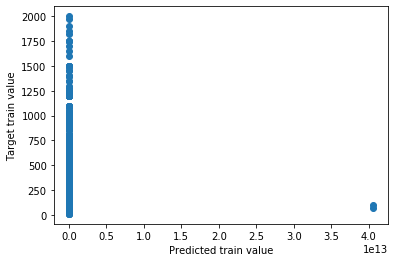



R square score =  -4.517706796821788e+16
RMSE =  36924018845.59726


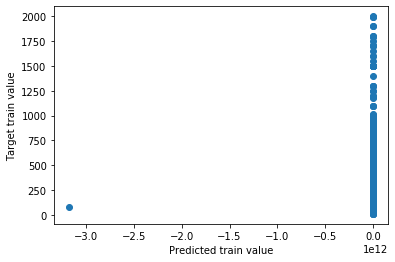



R square score =  0.4436483334883393
RMSE =  121.95141895369154


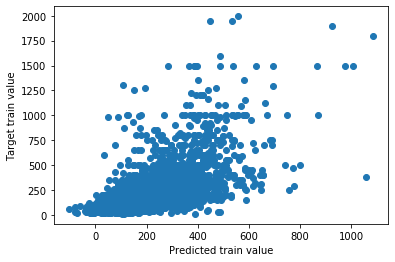



R square score =  0.4678180744838397
RMSE =  120.87430879229898


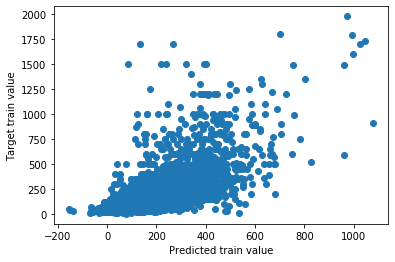



R square score =  0.44939135603552494
RMSE =  118.99006680799823


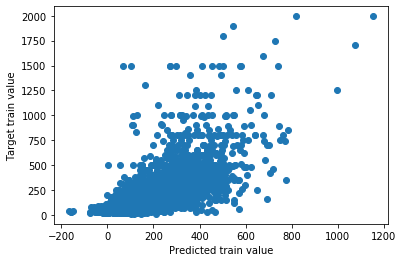



R square score =  -2.5138468617604256e+17
RMSE =  85128236330.63853


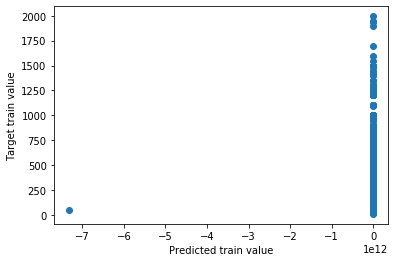



R square score =  0.4480055652484888
RMSE =  121.04067092825866


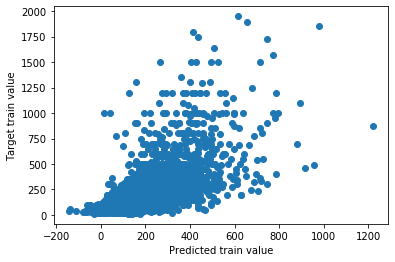



R square score =  0.46103733747636
RMSE =  123.16855618597081


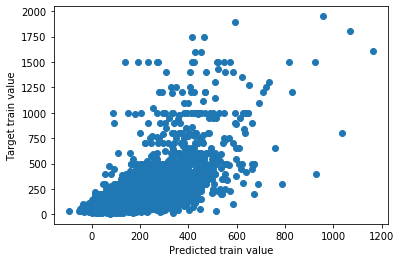



R square score =  0.4563794937355302
RMSE =  127.25233817786084


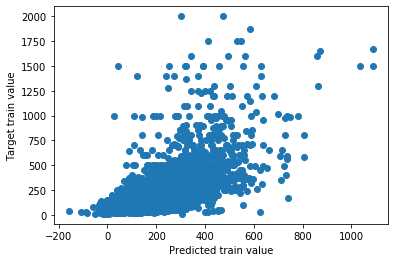



R square score =  0.4257848395220173
RMSE =  136.32754502569813


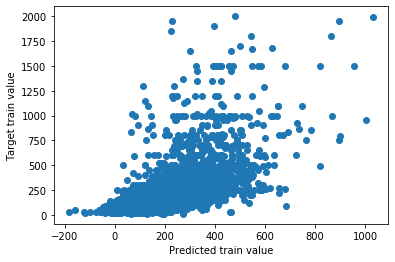



*---------------------------*
Average Rscore =  0.45029499999858574
Average RMSE =  124.2292721245396


*-----------------------------------------------------------------------*
Linear Regression on Train data set with log transform of target variable
*-----------------------------------------------------------------------*


R square score =  -3.374936089094491e+19
RMSE =  4160818502.377299


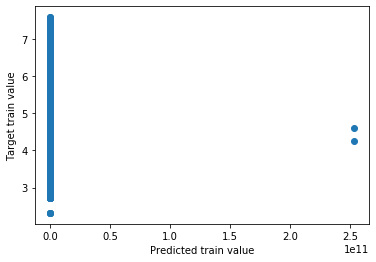



R square score =  -1.2419808510455292e+16
RMSE =  79933917.44919786


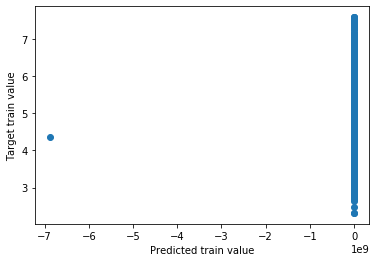



R square score =  0.5890642626147805
RMSE =  0.45681853949620077


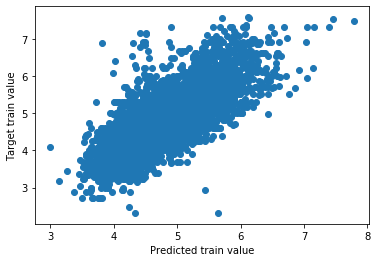



R square score =  0.592699390935046
RMSE =  0.46145582959595943


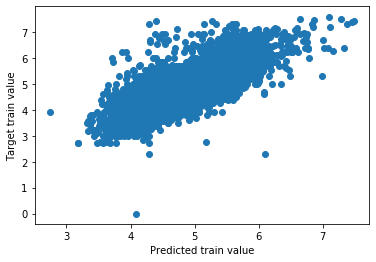



R square score =  0.5927113537350108
RMSE =  0.4537453856326629


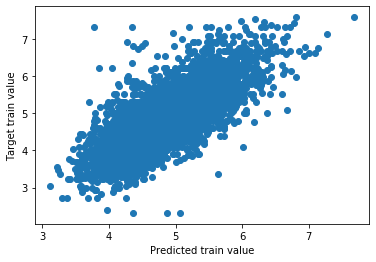



R square score =  -1.53740352438546e+17
RMSE =  278015896.2301011


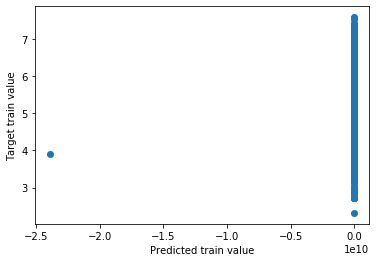



R square score =  0.5978663743718298
RMSE =  0.4529682974620626


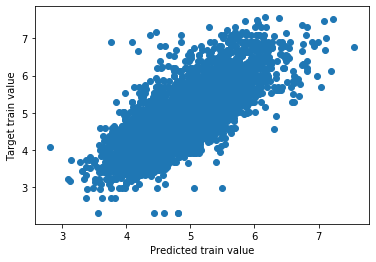



R square score =  0.6073001466173787
RMSE =  0.44944186867750563


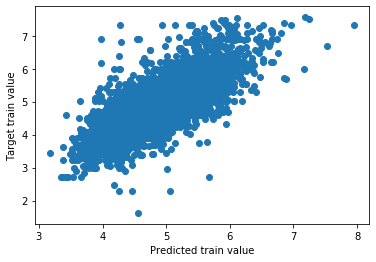



R square score =  0.607539900296568
RMSE =  0.45351594386824334


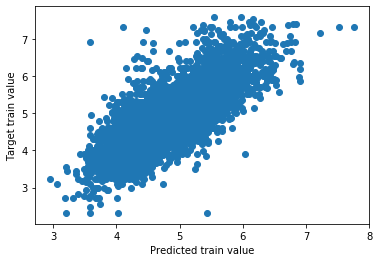



R square score =  0.5895300318209915
RMSE =  0.4667225355358018


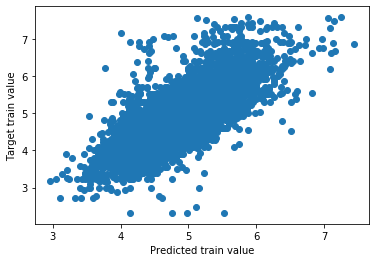



*---------------------------*
Average Rscore =  0.5966730657702293
Average RMSE =  0.4563812000383481


In [62]:
print('*-----------------------------------------------------------------------*')
print('Linear Regression on Train data set without transform of target variable')
print('*-----------------------------------------------------------------------*')
print('\n')
model(LinearRegression(0.0001), X, y)
print('\n')
print('*-----------------------------------------------------------------------*')
print('Linear Regression on Train data set with log transform of target variable')
print('*-----------------------------------------------------------------------*')
print('\n')
model(LinearRegression(0.0001), X, y_log)

# Ridge Regression on Train data set



*-----------------------------------------------------------------------*
Ridge Regression on Train data set without transform of target variable
*-----------------------------------------------------------------------*
R square score =  0.44295554363108225
RMSE =  125.76265392990366


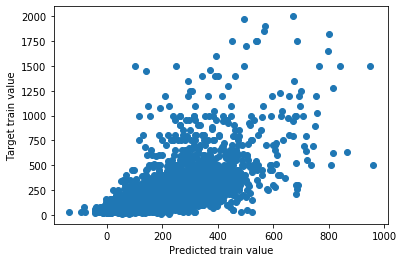



R square score =  0.4345148479549137
RMSE =  130.63529980960772


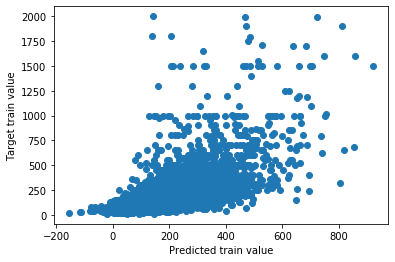



R square score =  0.44448884141118944
RMSE =  121.85926512127149


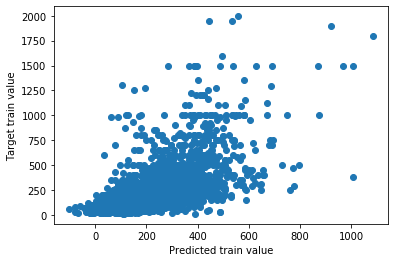



R square score =  0.46874909366004835
RMSE =  120.76853146699699


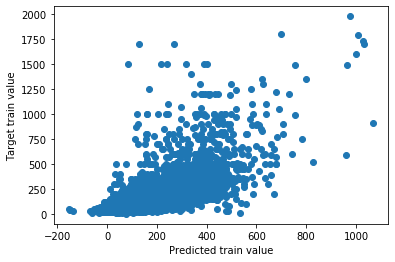



R square score =  0.44945915913427187
RMSE =  118.98274023972894


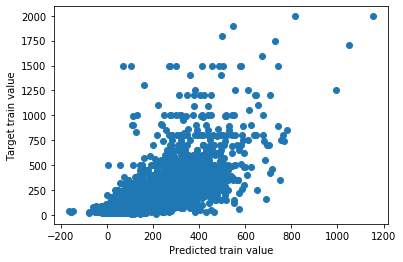



R square score =  0.4535128924524652
RMSE =  125.51458292777303


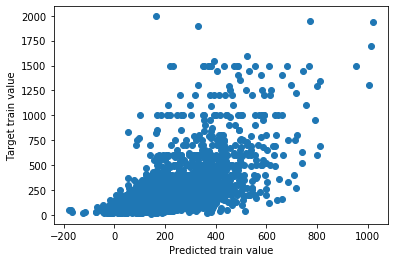



R square score =  0.4485166456928756
RMSE =  120.98462340159391


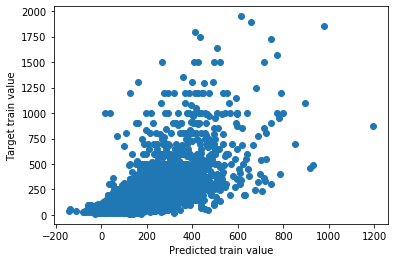



R square score =  0.4610447940019071
RMSE =  123.16770416715187


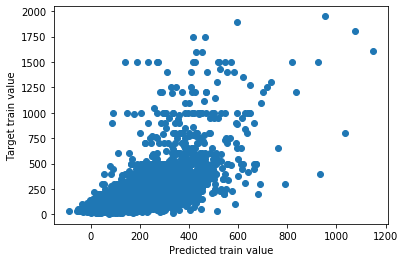



R square score =  0.4563969106722753
RMSE =  127.250299656823


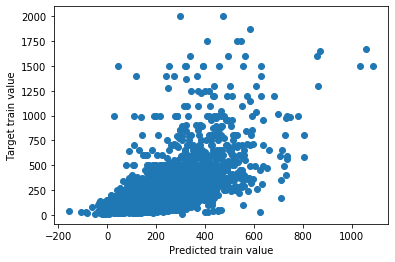



R square score =  0.4259628541188878
RMSE =  136.3064116807359


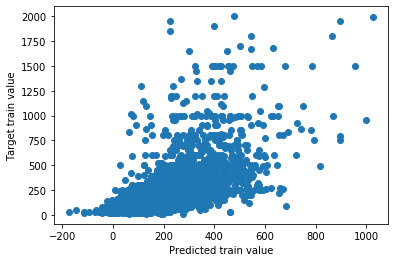



*---------------------------*
Average Rscore =  0.44856015827299167
Average RMSE =  125.12321124015867


*-----------------------------------------------------------------------*
Ridge Regression on Train data set with log transform of target variable
*-----------------------------------------------------------------------*


R square score =  0.5938344275525391
RMSE =  0.45645455981235183


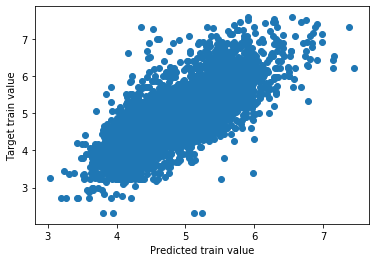



R square score =  0.6043074250096478
RMSE =  0.4511828655388662


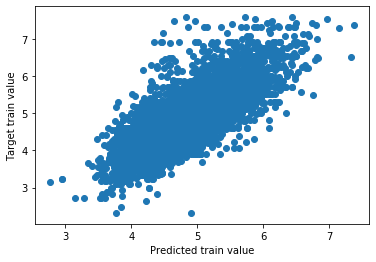



R square score =  0.5904699521538426
RMSE =  0.456036549671475


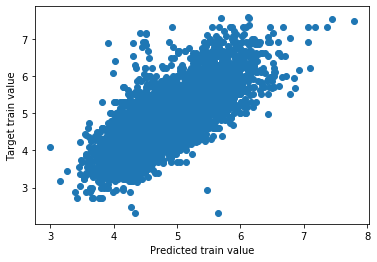



R square score =  0.5941822923772084
RMSE =  0.4606150286237641


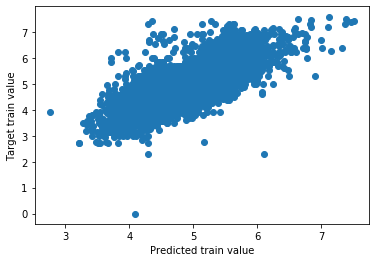



R square score =  0.593074306932613
RMSE =  0.4535431641286099


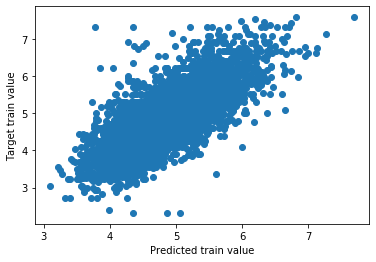



R square score =  0.591362102880204
RMSE =  0.4532575141866898


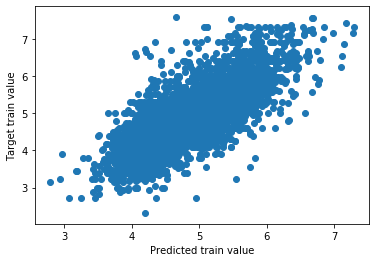



R square score =  0.5979813600730544
RMSE =  0.4529035321728604


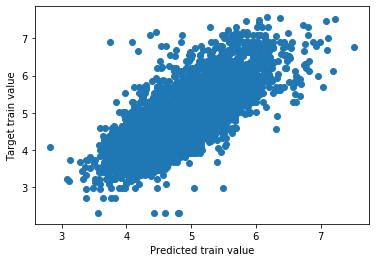



R square score =  0.607775150587645
RMSE =  0.4491699672916956


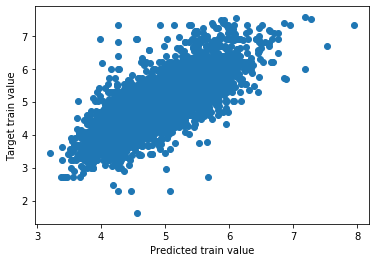



R square score =  0.6077370109491735
RMSE =  0.4534020417788362


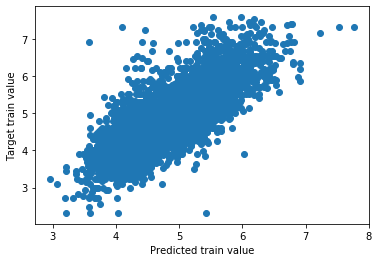



R square score =  0.5900314231968454
RMSE =  0.46643739633270237


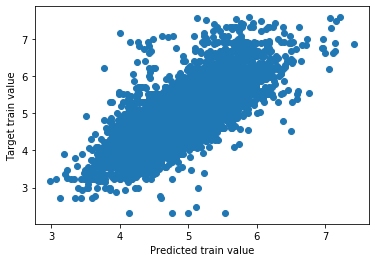



*---------------------------*
Average Rscore =  0.5970755451712774
Average RMSE =  0.45530026195378526


In [63]:
print('\n')
print('*-----------------------------------------------------------------------*')
print('Ridge Regression on Train data set without transform of target variable')
print('*-----------------------------------------------------------------------*')
model(Ridge(), X, y)
print('\n')
print('*-----------------------------------------------------------------------*')
print('Ridge Regression on Train data set with log transform of target variable')
print('*-----------------------------------------------------------------------*')
print('\n')
model(Ridge(), X, y_log)


# Lasoo Regression on Train data set



*-----------------------------------------------------------------------*
Lasso Regression on Train data set without transform of target variable
*-----------------------------------------------------------------------*
R square score =  0.4427876871753572
RMSE =  125.78160078688568


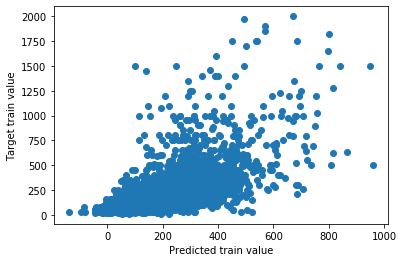



R square score =  0.434434243257075
RMSE =  130.6446099069858


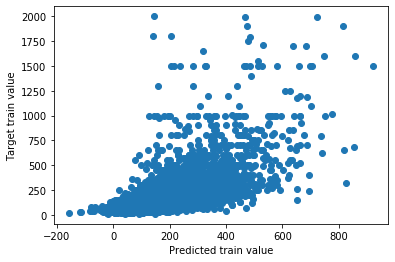



R square score =  0.44425169780751406
RMSE =  121.8852727553058


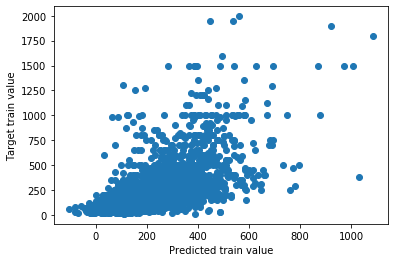



R square score =  0.46874387204938295
RMSE =  120.76912497629259


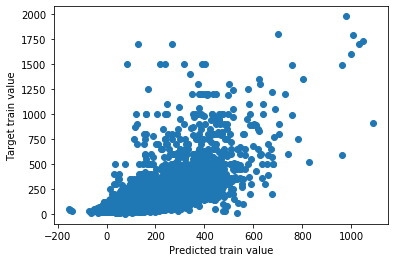



R square score =  0.4494668048501445
RMSE =  118.98191404181902


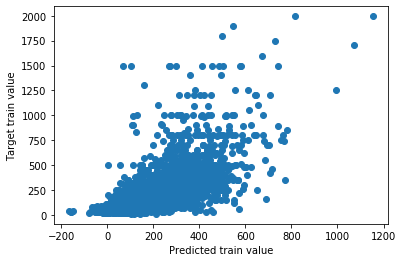



R square score =  0.4533229204608207
RMSE =  125.53639696795958


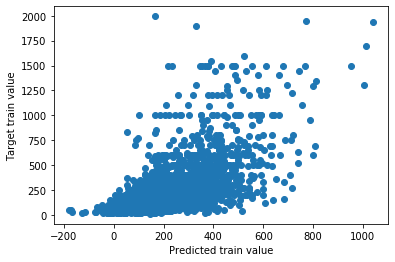



R square score =  0.44802338357334437
RMSE =  121.03871732214898


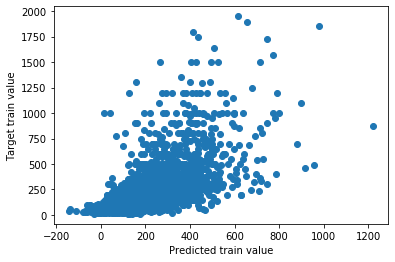



R square score =  0.46105424995246247
RMSE =  123.16662367584553


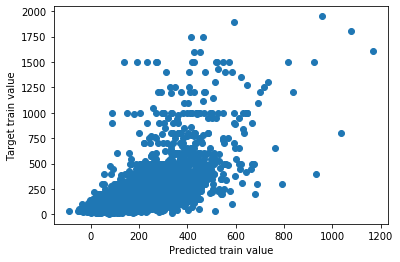



R square score =  0.45633592902535164
RMSE =  127.2574369555074


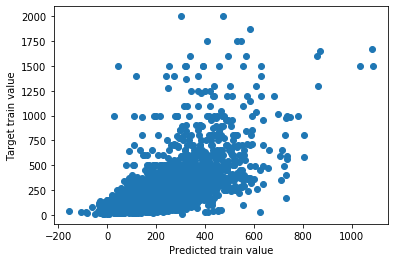



R square score =  0.425968954694525
RMSE =  136.30568738110688


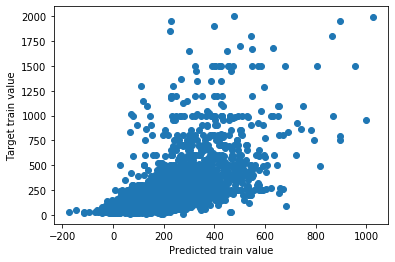



*---------------------------*
Average Rscore =  0.4484389742845979
Average RMSE =  125.13673847698574


*-----------------------------------------------------------------------*
Lasso Regression on Train data set with log transform of target variable
*-----------------------------------------------------------------------*


R square score =  0.5930062177038933
RMSE =  0.45691969973174346


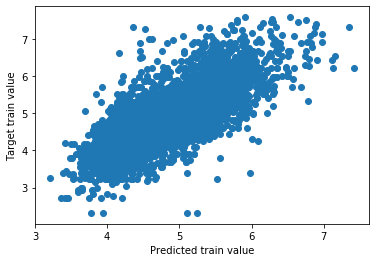



R square score =  0.6039502182269887
RMSE =  0.45138646959135936


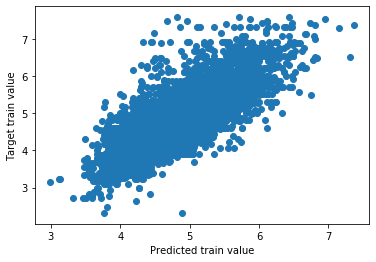



R square score =  0.5899701625745208
RMSE =  0.4563147378287785


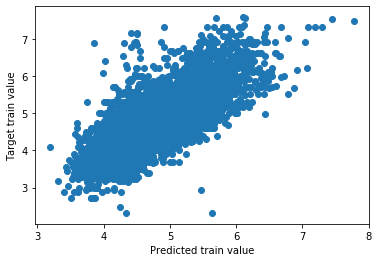



R square score =  0.593129577767727
RMSE =  0.4612120726978696


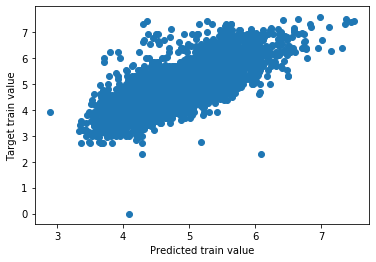



R square score =  0.5918596949218788
RMSE =  0.4542195388618107


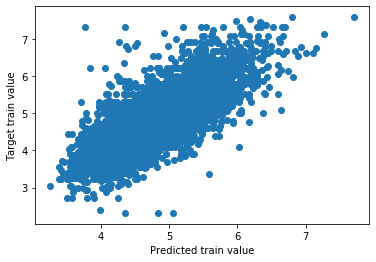



R square score =  0.5918195907615554
RMSE =  0.45300372239336106


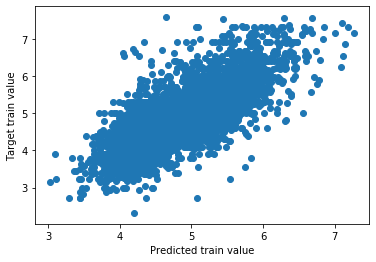



R square score =  0.5980244473734655
RMSE =  0.4528792610178527


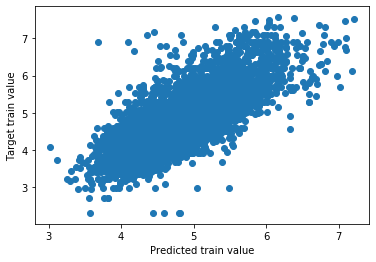



R square score =  0.607287300264138
RMSE =  0.44944921989210207


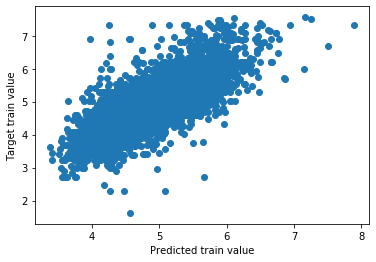



R square score =  0.6075902210763875
RMSE =  0.4534868682914528


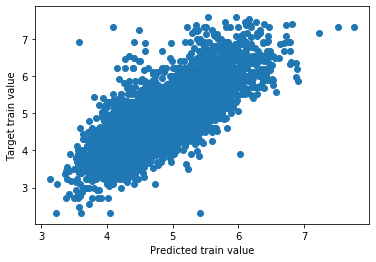



R square score =  0.5897776489875881
RMSE =  0.4665817384552435


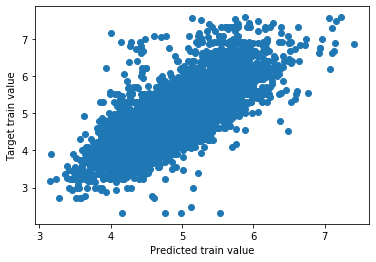



*---------------------------*
Average Rscore =  0.5966415079658144
Average RMSE =  0.45554533287615734


In [64]:
print('\n')
print('*-----------------------------------------------------------------------*')
print('Lasso Regression on Train data set without transform of target variable')
print('*-----------------------------------------------------------------------*')
model(Lasso(0.0001), X, y)
print('\n')
print('*-----------------------------------------------------------------------*')
print('Lasso Regression on Train data set with log transform of target variable')
print('*-----------------------------------------------------------------------*')
print('\n')
model(Lasso(0.0001), X, y_log)

##  Cannot use classifier models because we need to predict continuous variable. Classifier Models doesn't work for predicting continuous variables

## KNeighbours Classifier on Train data set

In [65]:
model(KNeighborsClassifier(n_neighbors=50), X, y)
model(KNeighborsClassifier(n_neighbors=50), X, y_log)

ValueError: Unknown label type: 'continuous'

## Linear SVC Classifier on Train data set

In [66]:
model(LinearSVC(0.0001), X, y)
model(LinearSVC(0.0001), X, y_log)

ValueError: Unknown label type: 'continuous'

# XG Boost on Train data set



*-----------------------------------------------------------------------*
XG Boost on Train data set without transform of target variable
*-----------------------------------------------------------------------*
R square score =  0.4749156324960955
RMSE =  122.10158730699631


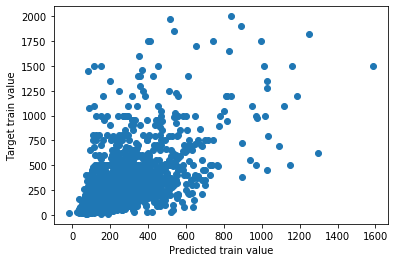



R square score =  0.46819012891818834
RMSE =  126.68585894064148


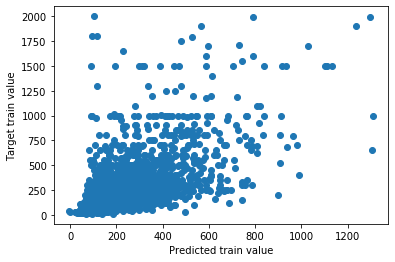



R square score =  0.47325267134037735
RMSE =  118.66245580521336


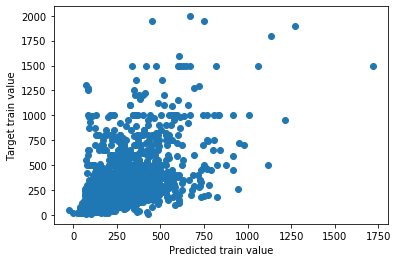



R square score =  0.49874184820732514
RMSE =  117.30990081556587


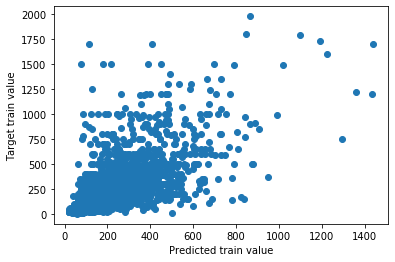



R square score =  0.4964222071644738
RMSE =  113.79481675993405


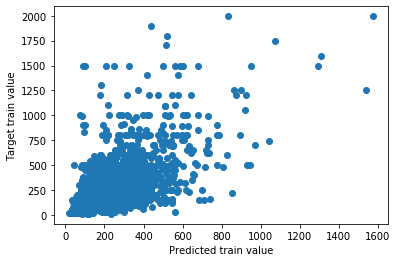



R square score =  0.500913004590285
RMSE =  119.94781848856823


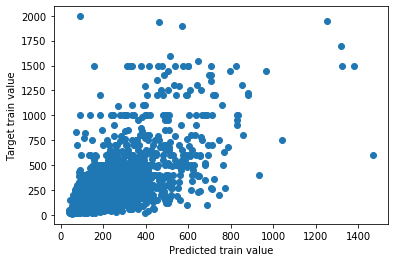



R square score =  0.486969765455149
RMSE =  116.69048713895407


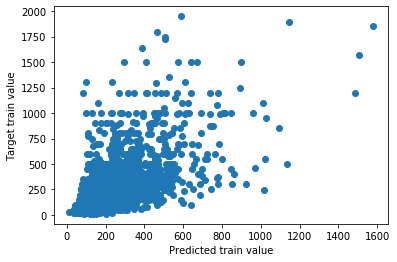



R square score =  0.49088521529015633
RMSE =  119.709430636837


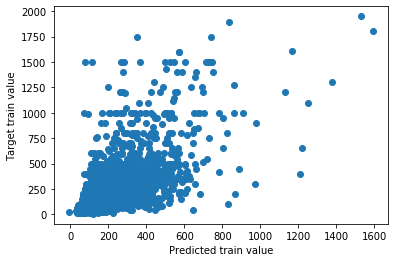



R square score =  0.4819856126411326
RMSE =  124.21921106105975


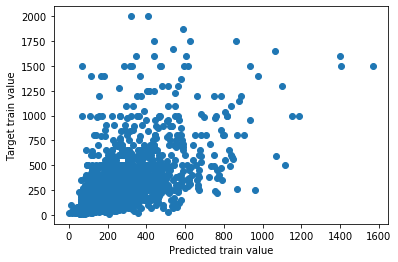



R square score =  0.46538405259202287
RMSE =  131.54284832123196


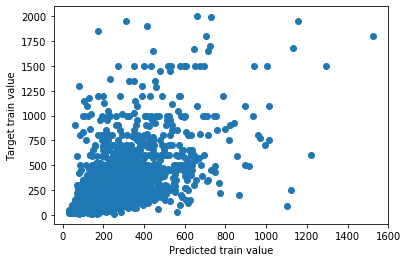



*---------------------------*
Average Rscore =  0.4837660138695205
Average RMSE =  121.0664415275002


*-----------------------------------------------------------------------*
XG Boost on Train data set with log transform of target variable
*-----------------------------------------------------------------------*


R square score =  0.5484439892583808
RMSE =  0.4812844269115995


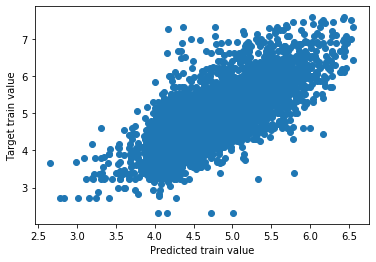



R square score =  0.5501356540141811
RMSE =  0.48107682377426947


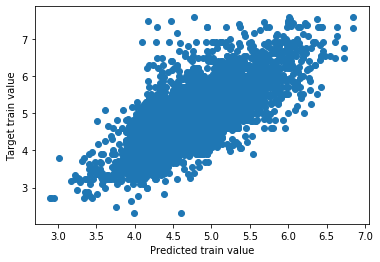



R square score =  0.5541083059229678
RMSE =  0.47585151505348605


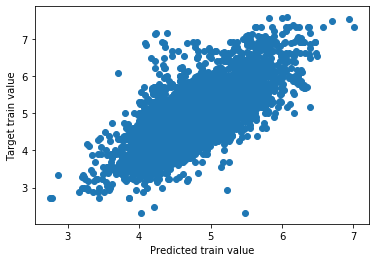



R square score =  0.559960270607706
RMSE =  0.47964348688771663


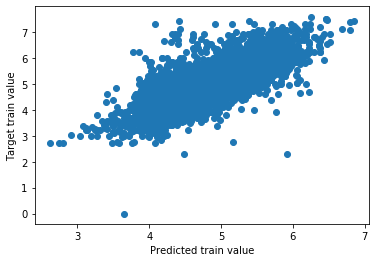



R square score =  0.5470335585082565
RMSE =  0.4785133775990788


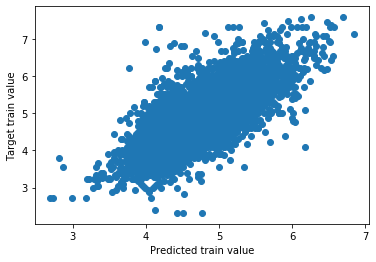



R square score =  0.5513907442466253
RMSE =  0.47490835176522056


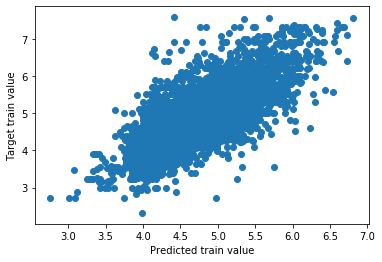



R square score =  0.5592317515234861
RMSE =  0.4742286235669003


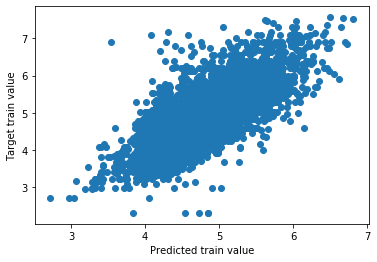



R square score =  0.5634756512803479
RMSE =  0.47385710250996016


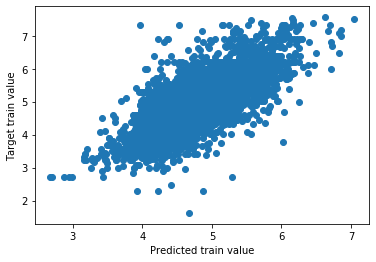



R square score =  0.5583903134913295
RMSE =  0.48107645306705415


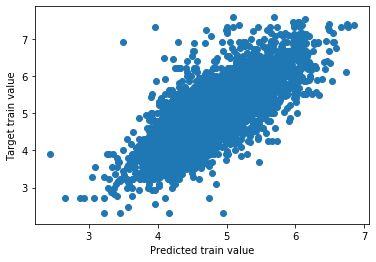



R square score =  0.5560449224285532
RMSE =  0.48538638582433824


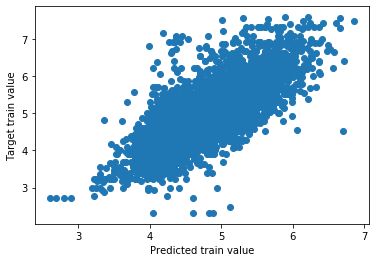



*---------------------------*
Average Rscore =  0.5548215161281835
Average RMSE =  0.47858265469596234


In [67]:
print('\n')
print('*-----------------------------------------------------------------------*')
print('XG Boost on Train data set without transform of target variable')
print('*-----------------------------------------------------------------------*')
model(xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123, verbosity = 0) , X, y)
print('\n')
print('*-----------------------------------------------------------------------*')
print('XG Boost on Train data set with log transform of target variable')
print('*-----------------------------------------------------------------------*')
print('\n')
model(xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123, verbosity = 0) , X, y_log)

# Random Forest on Train data set

In [ ]:
#takes lot of time in execution

print('\n')
print('*-----------------------------------------------------------------------*')
print('Random Forest on Train data set without transform of target variable')
print('*-----------------------------------------------------------------------*')
model(RandomForestRegressor(n_estimators = 10, random_state = 42), X, y)
print('\n')
print('*-----------------------------------------------------------------------*')
print('Random Forest on Train data set with log transform of target variable')
print('*-----------------------------------------------------------------------*')
print('\n')
model(RandomForestRegressor(n_estimators = 10, random_state = 42), X, y_log)

In [69]:
print(utils.multiclass.type_of_target(y_train))

continuous


In [ ]:
parameters = {"alpha":np.logspace(-2,2,50)}
lasso_grid = GridSearchCV(lasso, parameters, cv=10) 
lasso_grid.fit(X,y)

print('Hyper Parameters for Lasso:\n',lasso_grid.best_params_)
print('Score for Hyper Parameters from Grid Search:',lasso_grid.best_score_)
lasso_grid.cv_results_

In [68]:
pca0 = PCA()
pca0.fit(r_train_df)
X_train = pca0.transform(r_train_df)
y_train = np.exp(train_data['log_price'])
y_train_log = train_data['log_price']

X_test = pca0.transform(r_test_df)

## Prediction on Test Data set using Lasso/XGB Regressor

In [71]:
lasso = Lasso(0.0001)
lasso.fit(X_train, y_train)

# Prices predicted for test dataset is given by 'price_predicted'
price_predicted = lasso.predict(X_test)

# xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123, verbosity = 0) 
# xgb_r.fit(X_train, y_train)
        
# price_predicted = xgb_r.predict(X_test)

lasso = Lasso(0.0001)
lasso.fit(X_train, y_train_log)

# Prices predicted for test dataset is given by 'price_predicted'
log_price_predicted = lasso.predict(X_test)

# xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123, verbosity = 0) 
# xgb_r.fit(X_train, y_train_log)
        
# log_price_predicted = xgb_r.predict(X_test)

In [72]:
print('*-----------------------------------------------------------------------*')
print('Price Prediction of test data without transform of target variable')
print('*-----------------------------------------------------------------------*')
print('\n')
print(price_predicted)

print('\n')
print('*-----------------------------------------------------------------------*')
print('Price Prediction of test data with log transform of target variable')
print('*-----------------------------------------------------------------------*')
print('\n')
print(log_price_predicted)

*-----------------------------------------------------------------------*
Price Prediction of test data without transform of target variable
*-----------------------------------------------------------------------*


[ 48.98850534 176.85136206  73.12343857 ... 107.7283747  196.50619982
  78.01219586]


*-----------------------------------------------------------------------*
Price Prediction of test data with log transform of target variable
*-----------------------------------------------------------------------*


[4.28149168 5.12159047 4.39044085 ... 4.69574678 5.08814047 4.23189025]


In [73]:
preds = pd.DataFrame(price_predicted, columns=['log_price'])

log_preds = pd.DataFrame(log_price_predicted, columns=['log_price'])

## Method to retrieve individual city price from the above predicted price from test data

In [75]:
def getCityPrice (Citytest, preds):

    City_test_index = np.array(Citytest.index)

    City_test_price = np.array
    for i in range (0,City_test_index.size):
        City_test_price = np.append(City_test_price,preds.iloc[City_test_index[i]]['log_price'])
    
    City_test_price = np.delete(City_test_price, 0)
    return City_test_price

In [76]:
NYC_test_logprice = getCityPrice(NYCtest, log_preds)
DC_test_logprice = getCityPrice(DCtest, log_preds)
SF_test_logprice = getCityPrice(SFtest, log_preds)
LA_test_logprice = getCityPrice(LAtest, log_preds)
Boston_test_logprice = getCityPrice(Bostontest, log_preds)
Chicago_test_logprice = getCityPrice(Chicagotest, log_preds)

In [77]:
NYC_test_price = getCityPrice(NYCtest, preds)
DC_test_price = getCityPrice(DCtest, preds)
SF_test_price = getCityPrice(SFtest, preds)
LA_test_price = getCityPrice(LAtest, preds)
Boston_test_price = getCityPrice(Bostontest, preds)
Chicago_test_price = getCityPrice(Chicagotest, preds)

## Method to predict test data of city prices individually

In [78]:
def CityPricePrediction (CityTrain, CityTest, train_df, City , x = ' '):
    pca0 = PCA()
    pca0.fit(CityTrain)
    X_train = pca0.transform(CityTrain)
    
    if x == 'log':
        y_train = train_data[train_data['city'] == City]['log_price']
    else:
        y_train = train_data[train_data['city'] == City]['log_price']
        y_train = np.exp(y_train)

    
    X_test = pca0.transform(CityTest)

    lasso = Lasso(0.001)
    lasso.fit(X_train, y_train)

    # Prices predicted for test dataset is given by 'price_predicted'
    City_Price_Predicted = lasso.predict(X_test)

#     xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123, verbosity = 0) 
#     xgb_r.fit(X_train, y_train)
        
#     City_Price_Predicted = xgb_r.predict(X_test)
    
    return City_Price_Predicted

In [79]:
NYC_logPrice_Predicted = CityPricePrediction(NYCtrain, NYCtest, train_data, 'NYC', 'log')
DC_logPrice_Predicted = CityPricePrediction(DCtrain, DCtest, train_data, 'DC','log')
SF_logPrice_Predicted = CityPricePrediction(SFtrain, SFtest, train_data, 'SF','log')
LA_logPrice_Predicted = CityPricePrediction(LAtrain, LAtest, train_data, 'LA','log')
Chicago_logPrice_Predicted = CityPricePrediction(Chicagotrain, Chicagotest, train_data, 'Chicago','log')
Boston_logPrice_Predicted = CityPricePrediction(Bostontrain, Bostontest, train_data, 'Boston','log')

In [80]:
NYC_Price_Predicted = CityPricePrediction(NYCtrain, NYCtest, train_data, 'NYC')
DC_Price_Predicted = CityPricePrediction(DCtrain, DCtest, train_data, 'DC')
SF_Price_Predicted = CityPricePrediction(SFtrain, SFtest, train_data, 'SF')
LA_Price_Predicted = CityPricePrediction(LAtrain, LAtest, train_data, 'LA')
Chicago_Price_Predicted = CityPricePrediction(Chicagotrain, Chicagotest, train_data, 'Chicago')
Boston_Price_Predicted = CityPricePrediction(Bostontrain, Bostontest, train_data, 'Boston')

## Evaluating the metrics between city prices predicted as a combined set and as an individual set

In [81]:
print('*-----------------------------------------------------------------------------------*')
print('RMSE scores of log price on individual cities and test data predicted values')
print('*-----------------------------------------------------------------------------------*')
print('\n')

NYC_MSE = mse(NYC_logPrice_Predicted, NYC_test_logprice)
print('NYC log RMSE     : ', NYC_MSE)
DC_MSE = mse(DC_logPrice_Predicted, DC_test_logprice)
print('DC log RMSE      : ', DC_MSE)
SF_MSE = mse(SF_logPrice_Predicted, SF_test_logprice)
print('SF log RMSE      : ', SF_MSE)
LA_MSE = mse(LA_logPrice_Predicted, LA_test_logprice)
print('LA log RMSE      : ', LA_MSE)
Chicago_MSE = mse(Chicago_logPrice_Predicted, Chicago_test_logprice)
print('Chicago log RMSE : ', Chicago_MSE)
Boston_MSE = mse(Boston_logPrice_Predicted, Boston_test_logprice)
print('Boston log RMSE  : ', Boston_MSE)

*-----------------------------------------------------------------------------------*
RMSE scores of log price on individual cities and test data predicted values
*-----------------------------------------------------------------------------------*


NYC log RMSE     :  0.008029651643286746
DC log RMSE      :  0.05542039837712347
SF log RMSE      :  0.011221810201320343
LA log RMSE      :  0.009392647482830469
Chicago log RMSE :  0.016197490547879532
Boston log RMSE  :  0.023617761009688314


In [82]:
print('*-----------------------------------------------------------------------------------*')
print('RMSE scores of price on individual cities and test data predicted values')
print('*-----------------------------------------------------------------------------------*')
print('\n')

NYC_MSE = mse(NYC_Price_Predicted, NYC_test_price)
print('NYC RMSE     : ', NYC_MSE)
DC_MSE = mse(DC_Price_Predicted, DC_test_price)
print('DC RMSE      : ', DC_MSE)
SF_MSE = mse(SF_Price_Predicted, SF_test_price)
print('SF RMSE      : ', SF_MSE)
LA_MSE = mse(LA_Price_Predicted, LA_test_price)
print('LA RMSE      : ', LA_MSE)
Chicago_MSE = mse(Chicago_Price_Predicted, Chicago_test_price)
print('Chicago RMSE : ', Chicago_MSE)
Boston_MSE = mse(Boston_Price_Predicted, Boston_test_price)
print('Boston RMSE  : ', Boston_MSE)

*-----------------------------------------------------------------------------------*
RMSE scores of price on individual cities and test data predicted values
*-----------------------------------------------------------------------------------*


NYC RMSE     :  484.40200845273165
DC RMSE      :  8858.090809964458
SF RMSE      :  2471.4670702224325
LA RMSE      :  608.0995579760256
Chicago RMSE :  2203.549546943662
Boston RMSE  :  2286.2171305573006
